In [2]:
#Training the model

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Directory containing the images of doctor's prescriptions
data_dir = ('C:/Users/lsrin/Downloads/ML Project/Hand Writing Project/Images_ML')

# Preprocess images (resize, grayscale, normalize)
def preprocess_image(image_path, img_size=(128, 32)): 
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize image (swap width and height correctly to (128, 32))
    img = cv2.resize(img, (img_size[1], img_size[0]))  # Resize to (width=32, height=128)
    # Normalize the pixel values
    img = img / 255.0
    # Expand dimensions to match input shape of CNN
    img = np.expand_dims(img, axis=-1)  # Ensure the shape is (128, 32, 1)
    return img

# Load images from folder
def load_images_from_folder(folder):
    images = []
    labels = []  # Add labels if you have for handwritten text parts
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = preprocess_image(img_path)
            images.append(img)
            # Add labels if available, for simplicity, I'm just adding dummy labels
            labels.append(1)  # Assume handwritten parts are labeled as 1
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_from_folder(data_dir)

# Reshape labels to (batch_size, 1)
y_train = labels.reshape(-1, 1)
y_val = labels.reshape(-1, 1)

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, y_train, test_size=0.2, random_state=42)

# Print shapes to confirm
print(f'x_train shape: {x_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_train shape after reshaping: {y_train.shape}')
print(f'y_val shape after reshaping: {y_val.shape}')

# Define the CNN-LSTM model
def create_handwritten_text_model(input_shape):
    model = models.Sequential()
    
    # CNN layers for feature extraction
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output from CNN
    model.add(layers.Flatten())
    
    # LSTM for sequential data (text sequences)
    model.add(layers.RepeatVector(1))  # Removed returning sequences
    model.add(layers.LSTM(128, return_sequences=False))  # Ensure it outputs a single vector
    
    # Final fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification for handwritten detection

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model
input_shape = (128, 32, 1)  # Input shape for the images (grayscale)
model = create_handwritten_text_model(input_shape)

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=16)

# Save the model for later use
model.save('handwritten_text_extractor.keras')


x_train shape: (37, 128, 32, 1)
x_val shape: (10, 128, 32, 1)
y_train shape after reshaping: (37, 1)
y_val shape after reshaping: (10, 1)


C:\Users\lsrin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 515ms/step - accuracy: 0.4088 - loss: 0.6639 - val_accuracy: 1.0000 - val_loss: 0.2937
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.2091 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 9.9804e-04
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 8.6839e-04 - val_accuracy: 1.0000 - val_loss: 4.8565e-04
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 4.5512e-04 - val_accuracy: 1.0000 - val_loss: 3.3027e-04
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 3.1487e-04 - val_accuracy: 1.0000 - val_loss: 2.4732e-04
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 2.3859e-04 - val_accuracy: 1.0000 - val_loss: 1.9939e-04
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 1.9400

In [3]:
#!pip install tensorflow

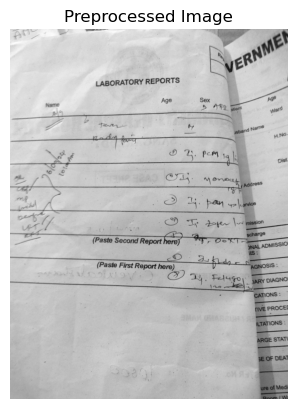

In [4]:
import cv2
import matplotlib.pyplot as plt

# Preprocess function
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Ensure the correct path is passed
    if img is None:
        print(f"Error loading image at {image_path}")
        return None  # Exit if the image cannot be loaded

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return blurred

# Display function
def display_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'C:/Users/lsrin/Downloads/ML Project/Hand Writing Project/Images_ML/1.jpg'
preprocessed_image = preprocess_image(image_path)
if preprocessed_image is not None:
    display_image(preprocessed_image, title="Preprocessed Image")


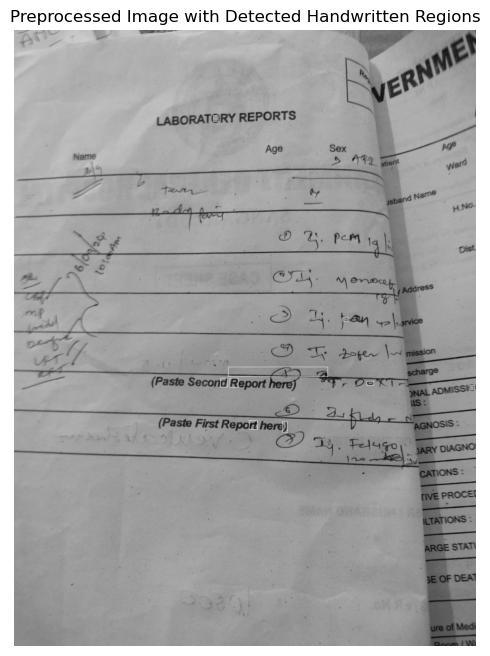

In [5]:
import cv2
import matplotlib.pyplot as plt

# Function to detect handwritten regions based on contours
def detect_handwritten_regions(image):
    # Detect edges in the image
    edges = cv2.Canny(image, 50, 150)

    # Find contours in the image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Iterate over contours and filter based on area (handwritten regions often have larger contours)
    handwritten_regions = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:  # You may need to adjust this value based on your dataset
            handwritten_regions.append(contour)
            
    return handwritten_regions

# Function to display images using matplotlib (instead of cv2.imshow)
def display_image(image, title='Image'):
    # If the image is colored, convert BGR (OpenCV default) to RGB for matplotlib
    if len(image.shape) == 3:  # Check if image is colored
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')  # Hide axis for a cleaner display
    plt.show()

# Load and preprocess the image (assuming grayscale for handwritten text)
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image at {image_path}")
        return None
    
    # Further preprocessing if necessary (e.g., thresholding, blurring, etc.)
    # For example, apply Gaussian Blur:
    image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

# Example usage
image_path = 'C:/Users/lsrin/Downloads/ML Project/Hand Writing Project/Images_ML/1.jpg'  # Replace with your image path
preprocessed_image = preprocess_image(image_path)

if preprocessed_image is not None:
    handwritten_regions = detect_handwritten_regions(preprocessed_image)

    # Draw rectangles around detected handwritten regions
    for region in handwritten_regions:
        x, y, w, h = cv2.boundingRect(region)
        cv2.rectangle(preprocessed_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the final image with detected handwritten regions
    display_image(preprocessed_image, title="Preprocessed Image with Detected Handwritten Regions")


In [6]:
#HAndwritten text recognization using CNN

from keras.models import load_model

# Load a pre-trained model 
model = load_model('handwritten_text_extractor.h5')

def recognize_handwritten_text(region):
    # Resize the region to the input shape expected by the model
    input_image = cv2.resize(region, (128, 32))  # You may need to adjust dimensions
    input_image = np.expand_dims(input_image, axis=-1)
    input_image = np.expand_dims(input_image, axis=0)
    
    # Predict the text using the model
    prediction = model.predict(input_image)
    
    # Convert the prediction to text (you may need to map the prediction to actual characters)
    predicted_text = decode_prediction(prediction)
    
    return predicted_text

# Example function to decode the model's prediction
def decode_prediction(pred):
    # You would need to map the model's output to characters. This is an example function.
    alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789'
    decoded_text = ''.join([alphabet[i] for i in np.argmax(pred, axis=-1)])
    return decoded_text

# Apply to each handwritten region
for region in handwritten_regions:
    x, y, w, h = cv2.boundingRect(region)
    handwritten_part = preprocessed_image[y:y+h, x:x+w]
    text = recognize_handwritten_text(handwritten_part)
    print(f"Recognized Handwritten Text: {text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
Recognized Handwritten Text: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Recognized Handwritten Text: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Recognized Handwritten Text: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Recognized Handwritten Text: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Recognized Handwritten Text: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Recognized Handwritten Text: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Recognized Handwritten Text: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Recognized Handwritten Text: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Recognized Handwritten Text: a


In [7]:
!pip install easyocr

  Using cached easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)
  Using cached torch-2.4.1-cp312-cp312-win_amd64.whl.metadata (27 kB)
  Using cached torchvision-0.19.1-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached python_bidi-0.6.0-cp312-none-win_amd64.whl.metadata (4.7 kB)
  Using cached shapely-2.0.6-cp312-cp312-win_amd64.whl.metadata (7.2 kB)
  Using cached pyclipper-1.3.0.post5-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached ninja-1.11.1.1-py2.py3-none-win_amd64.whl.metadata (5.4 kB)
Using cached easyocr-1.7.2-py3-none-any.whl (2.9 MB)
Using cached torchvision-0.19.1-cp312-cp312-win_amd64.whl (1.3 MB)
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/199.4 MB 217.9 kB/s eta 0:15:16
   ---------------------------------------- 0.1/199.4

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\lsrin\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



   ---------------------- --------------- 119.8/199.4 MB 909.3 kB/s eta 0:01:28
   ---------------------- --------------- 119.8/199.4 MB 909.3 kB/s eta 0:01:28
   ---------------------- --------------- 119.9/199.4 MB 905.5 kB/s eta 0:01:28
   ---------------------- --------------- 119.9/199.4 MB 903.0 kB/s eta 0:01:29
   ---------------------- --------------- 119.9/199.4 MB 899.3 kB/s eta 0:01:29
   ---------------------- --------------- 119.9/199.4 MB 898.1 kB/s eta 0:01:29
   ---------------------- --------------- 120.0/199.4 MB 895.6 kB/s eta 0:01:29
   ---------------------- --------------- 120.0/199.4 MB 893.2 kB/s eta 0:01:29
   ---------------------- --------------- 120.0/199.4 MB 892.0 kB/s eta 0:01:29
   ---------------------- --------------- 120.1/199.4 MB 889.5 kB/s eta 0:01:30
   ---------------------- --------------- 120.1/199.4 MB 887.2 kB/s eta 0:01:30
   ---------------------- --------------- 120.1/199.4 MB 887.2 kB/s eta 0:01:30
   ---------------------- --------------

In [8]:
import easyocr

def recognize_printed_text(image):
    # Initialize the EasyOCR reader with English language
    reader = easyocr.Reader(['en'])  
    
    # Apply EasyOCR to extract text from the image
    result = reader.readtext(image)
    
    # Combine the recognized text parts into a single string
    printed_text = ' '.join([text[1] for text in result])
    
    return printed_text


ModuleNotFoundError: No module named 'easyocr'

In [ ]:
# combining results
for region in handwritten_regions:
    x, y, w, h = cv2.boundingRect(region)
    handwritten_part = preprocessed_image[y:y+h, x:x+w]
    handwritten_text = recognize_handwritten_text(handwritten_part)
    print(f"Recognized Handwritten Text: {handwritten_text}")

# Process printed text
printed_text = recognize_printed_text(preprocessed_image)
print(f"Recognized Printed Text: {printed_text}")
